In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oac = pd.read_csv('csv/2011oac.csv')
print(oac.shape)
oac.head()

(232296, 11)


,Output Area Code,Local Authority Code,Local Authority Name,Region/Country Code,Region/Country Name,Supergroup Code,Supergroup Name,Group Code,Group Name,Subgroup Code,Subgroup Name
0,E00000001,E09000001,City of London,E12000007,London,2,Cosmopolitans,2d,Aspiring and Affluent,2d3,EU White-Collar Workers
1,E00000003,E09000001,City of London,E12000007,London,2,Cosmopolitans,2d,Aspiring and Affluent,2d2,Highly-Qualified Quaternary Workers
2,E00000005,E09000001,City of London,E12000007,London,2,Cosmopolitans,2d,Aspiring and Affluent,2d3,EU White-Collar Workers
3,E00000007,E09000001,City of London,E12000007,London,2,Cosmopolitans,2d,Aspiring and Affluent,2d3,EU White-Collar Workers
4,E00000010,E09000001,City of London,E12000007,London,2,Cosmopolitans,2d,Aspiring and Affluent,2d3,EU White-Collar Workers


In [3]:
conversion_chart = pd.read_csv('csv/pcd2oa.csv')
print(conversion_chart.shape)
conversion_chart.head()

/home/peterprescott/miniconda3/envs/babel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1308780, 11)


,PCD7,PCD8,OA11CD,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,LAD11NMW,PCDOASPLT
0,L19 7NE,L19 7NE,E00033887,E01006686,Liverpool 053E,E02001399,Liverpool 053,E08000012,Liverpool,NaN,0
1,L19 9AY,L19 9AY,E00033887,E01006686,Liverpool 053E,E02001399,Liverpool 053,E08000012,Liverpool,NaN,0
2,L19 7NQ,L19 7NQ,E00033887,E01006686,Liverpool 053E,E02001399,Liverpool 053,E08000012,Liverpool,NaN,0
3,L19 9BA,L19 9BA,E00033887,E01006686,Liverpool 053E,E02001399,Liverpool 053,E08000012,Liverpool,NaN,0
4,L19 9AP,L19 9AP,E00033888,E01006686,Liverpool 053E,E02001399,Liverpool 053,E08000012,Liverpool,NaN,0


In [4]:
portraits = pd.read_csv('csv/penportraits.csv')
print(portraits.shape)
portraits.head()

(103, 3)


,Code,Name,Description
0,1,Rural residents,The population of this supergroup live in rura...
1,1a,Farming communities,This group has a lower population density than...
2,1a1,Rural workers and families,The population of this subgroup has a slightly...
3,1a2,Established farming communities,"Compared with the parent supergroup, household..."
4,1a3,Agricultural communities,This subgroup has a lower population density t...


In [56]:
def geodem(postcode):
    """Get geodemographic classification for given postcode."""
    # first get output area of postcode
    try:
        output_area = conversion_chart.loc[conversion_chart.PCD7==postcode].OA11CD.values[0]
    except:
        output_area = 'Not Found'
    
    # then get classification of output area
    try:
        classification = oac.loc[oac['Output Area Code']==output_area]['Subgroup Code'].values[0]
    except:
        classification = 'Not Found'
    
    # also get relevant supergroup/group/subgroup pen portraits
    
    try:
        supergroup = portraits.loc[portraits.Code==classification[0]]
        group = portraits.loc[portraits.Code==classification[:2]]
        subgroup = portraits.loc[portraits.Code==classification]

        supergroup_description = supergroup.Description.values[0]
        group_description = group.Description.values[0]
        subgroup_description = subgroup.Description.values[0]
        
        supergroup = supergroup.Name.values[0]
        group = group.Name.values[0]
        subgroup = subgroup.Name.values[0]

    except:
        supergroup = group = subgroup = supergroup_description = group_description = subgroup_description = 'Not Found'
    
    
    return {'classification':classification,
            'supergroup':supergroup,
            'group':group,
            'subgroup':subgroup,
            'supergroup-description': supergroup_description,
            'group-description': group_description,
            'subgroup-description': subgroup_description
           }

In [6]:
churches = ['mossleyhill','gateway','sthelens','stoneycroftsalvationarmy']

In [57]:
data = {}
for church in churches:
    data[church] = pd.read_csv(f'sensitive/postcodes/{church}.csv')
    data[church]['Supergroup'] = data[church]['Postcode'].apply(lambda postcode: geodem(postcode)['supergroup'])
    data[church]['Group'] = data[church]['Postcode'].apply(lambda postcode: geodem(postcode)['group'])
    data[church]['Subgroup'] = data[church]['Postcode'].apply(lambda postcode: geodem(postcode)['subgroup'])

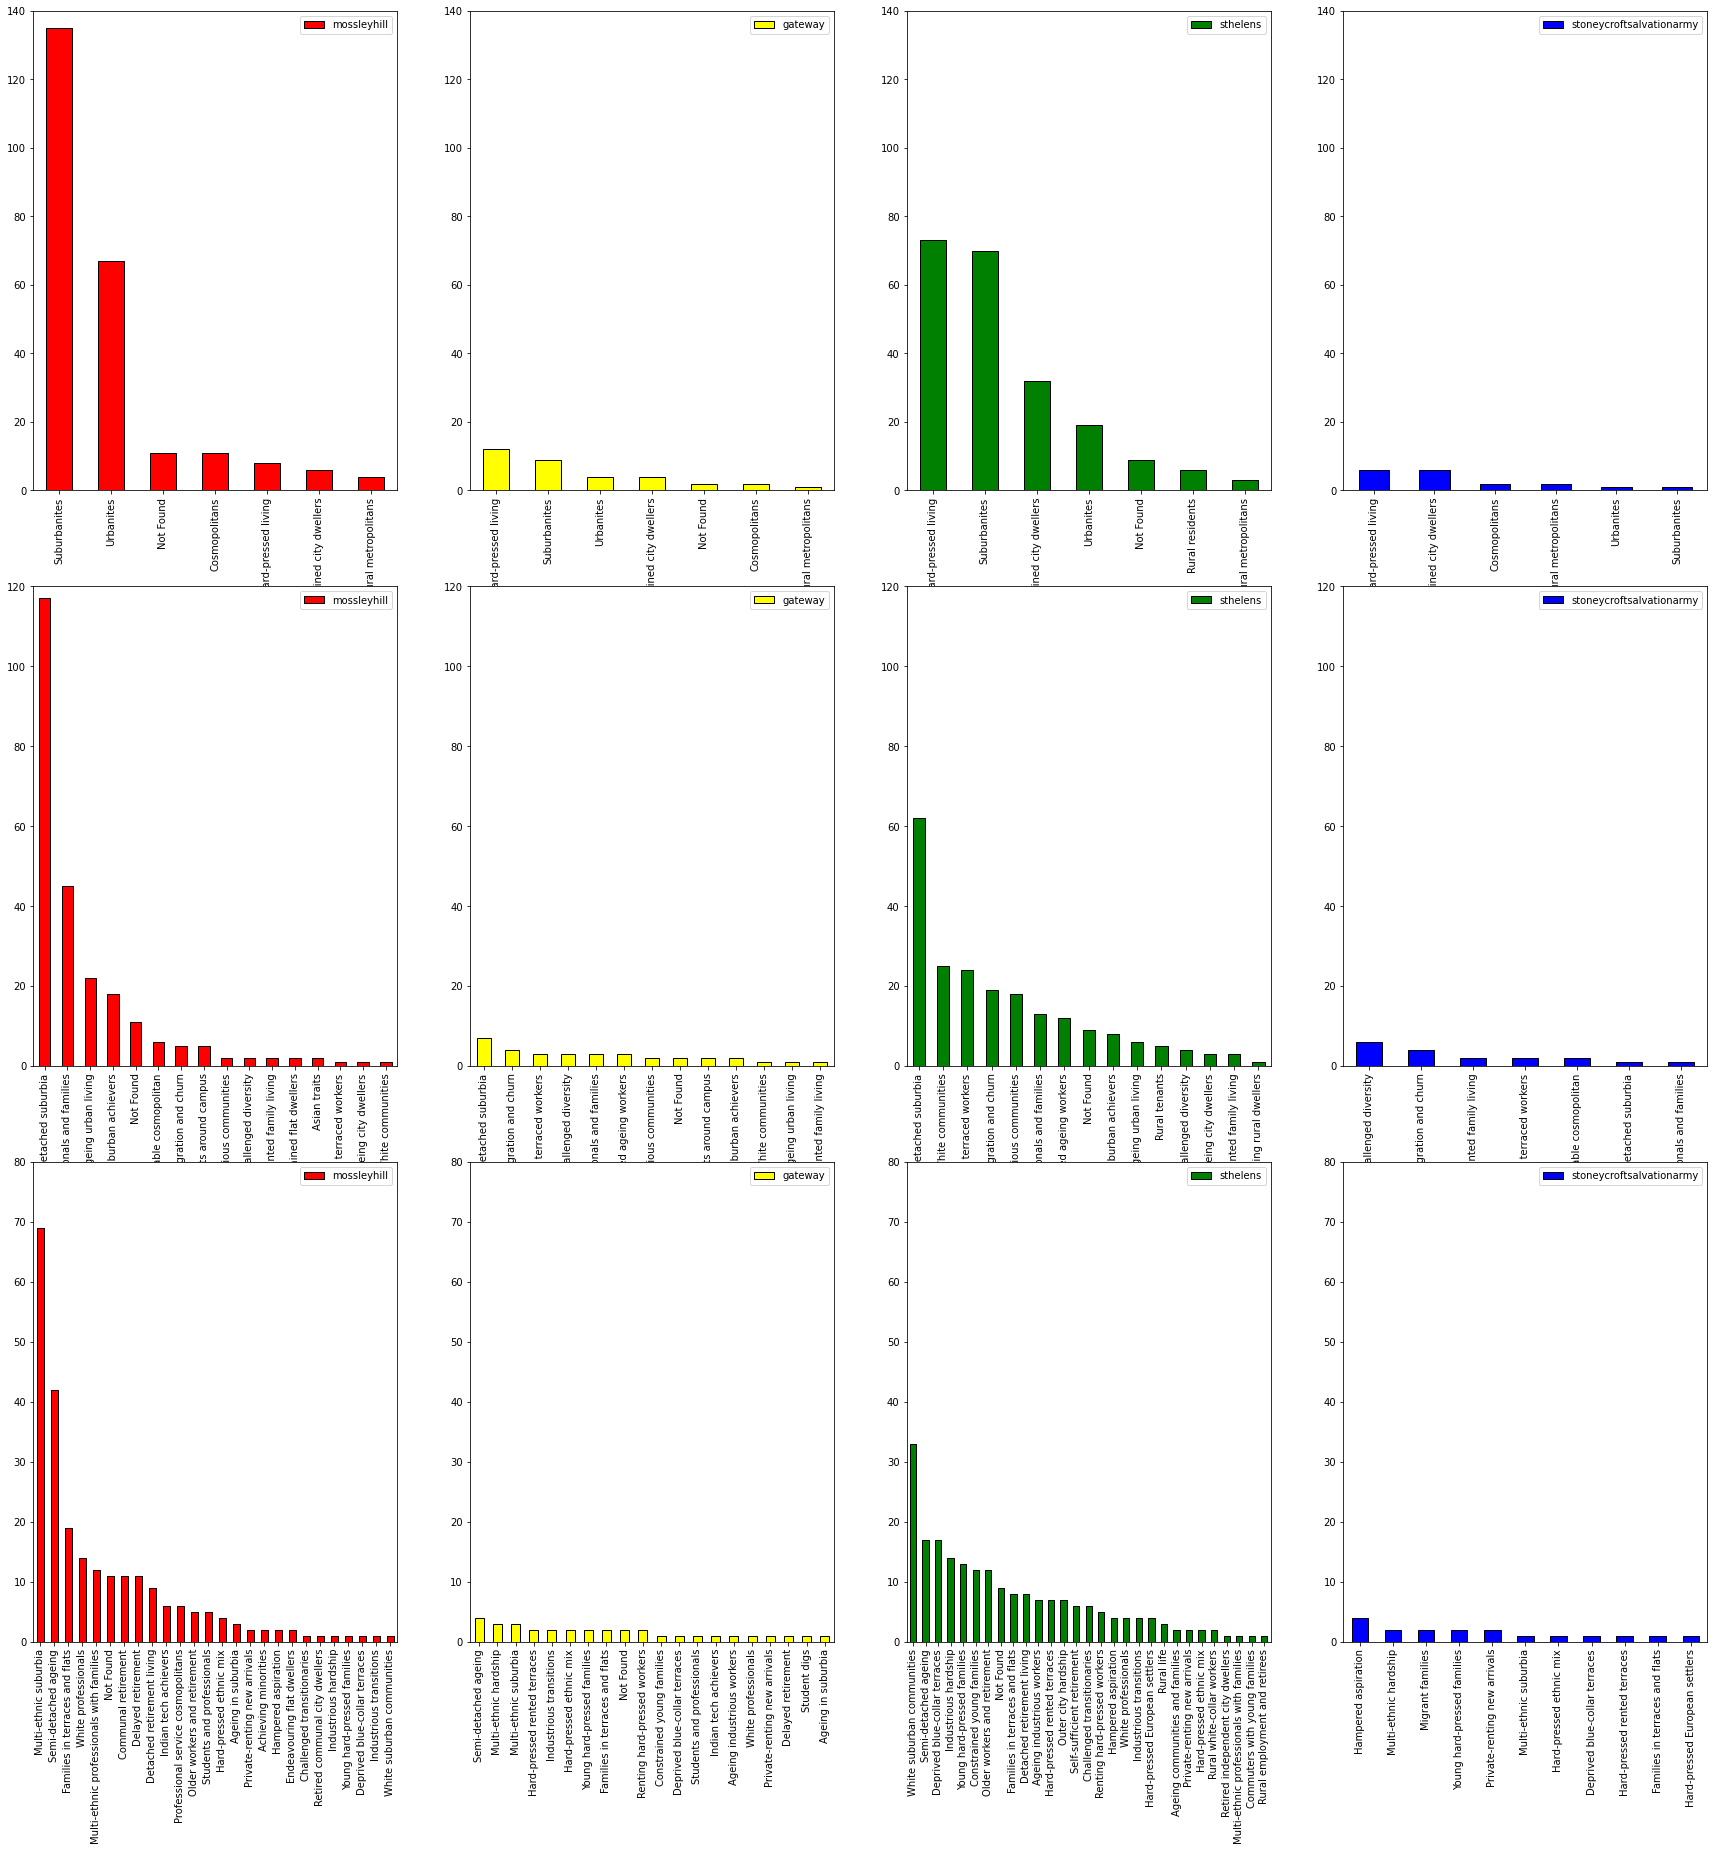

In [69]:
fig, axs = plt.subplots(3,4,figsize=(30,30))

colors = ['red','yellow','green','blue']
precision = ['Supergroup','Group','Subgroup']
limits = [140,120,80]

for i, church in enumerate(churches):
    for j, p in enumerate(precision):
        ax = axs[j][i]
        data[church][precision[j]].value_counts().plot.bar(ax=ax, label=church, color=colors[i], edgecolor='black')
        ax.set_title = church
        ax.set_ylim(0,limits[j])
        ax.legend()

plt.legend()
plt.show()

In [71]:
for church in churches:
    data[church].to_csv(f'sensitive/postcodes/{church}.csv',index=False)